 # Programación para el Análisis de Datos
 ### Tarea 3
 ##### Presentado por: Kevin Alejandro Cardenas Quintero
 ##### Grupo 39
 ##### Código: 203008069
 ##### Presentado a: Felipe Alexander Pipicano Guzman
 ##### Universidad Nacional Abierta y a Distancia - UNAD
 ##### 23 de Abril 2024

### Introducción:

**Introducción**

En el contexto de la gestión financiera y contable de una organización, la capacidad para analizar, interpretar y visualizar datos juega un papel fundamental en la toma de decisiones estratégicas. En este trabajo, se aborda el desafío de explorar y comprender los gastos incurridos por una empresa, centrándose en la distribución geográfica y por centro de costo. Para lograr este objetivo, se aplicarán diversas técnicas de análisis de datos y visualización científica, con el fin de proporcionar insights significativos que contribuyan a una gestión financiera eficiente y a la optimización de recursos.

El presente trabajo se estructura en base a tres conceptos fundamentales: parámetros y métricas descriptivas, escalamiento, estandarización y codificación, y gráficos y visualización científica. En el primer concepto, se realizará un análisis detallado de las variables numéricas y categóricas presentes en la base de datos, calculando métricas descriptivas y explorando la matriz de correlación para identificar posibles relaciones entre las variables. En el segundo concepto, se llevará a cabo la categorización y escalamiento de variables continuas, facilitando la comparación y análisis de distribuciones. Por último, en el tercer concepto, se emplearán diversos tipos de gráficos y visualizaciones para representar los datos de manera efectiva, incluyendo diagramas de barras, cajas, pie, scatter plots, diagramas de violín y mapas geoespaciales.

El objetivo principal de este trabajo es analizar los gastos incurridos en la organización con respecto a las ciudades y centros de costo, identificando patrones de gasto, áreas de oportunidad y posibles mejoras en la gestión financiera. Para ello, se aplicarán metodologías y herramientas analíticas.

A lo largo de este trabajo, se presentarán los resultados obtenidos de manera clara y concisa, acompañados de análisis detallados y comentarios significativos que ayuden a interpretar los datos de manera efectiva. El objetivo final es proporcionar a los tomadores de decisiones información valiosa y herramientas prácticas para mejorar la gestión financiera y optimizar el rendimiento empresarial.

## Limpieza de datos

In [50]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
df=pd.read_excel('/content/drive/MyDrive/Anexo 1- Fase 2-Clasificación_Proyecto_aplicado_Investigación.xlsx')

In [52]:
df.isna().sum()

Fecha de contabilización      283
Fecha de vencimiento          283
Serie                         567
Nº documento                  567
Nº folio                     5647
Nº de transacción             567
Cuenta de mayor/Código SN     567
Comentarios                   292
Proyecto                     5926
Cargo/Abono (ML)              567
Saldo acumulado (ML)          283
Autor                         567
CC                            567
SCC                           567
CIUDAD                        567
ZONA                          567
ACUMULADOR                   3234
dtype: int64

Se valida los datos faltantes en todas las variables. Se identidica que hay 567 datos en blanco, los cuales corresponden a los encabezados de cada cuenta contable

In [53]:
df = df.dropna(subset=['Autor'])

Se eliminan los datos en blanco, teniendo presente la variable Autor, la cual tiene 567 datos faltantes.

In [54]:
df.isna().sum()


Fecha de contabilización        0
Fecha de vencimiento            0
Serie                           0
Nº documento                    0
Nº folio                     5080
Nº de transacción               0
Cuenta de mayor/Código SN       0
Comentarios                     9
Proyecto                     5359
Cargo/Abono (ML)                0
Saldo acumulado (ML)            0
Autor                           0
CC                              0
SCC                             0
CIUDAD                          0
ZONA                            0
ACUMULADOR                   2667
dtype: int64

Se valida nuevamente, y se determina que se quitan los datos faltantes generales de las variables, que representan los encabezados de la cuentas contables.

In [55]:
# Lista de nombres de columnas a eliminar
columnas_a_eliminar = ['Fecha de vencimiento', 'Serie', 'Nº documento', 'Nº folio', "ACUMULADOR", "Comentarios"]

# Eliminar las columnas especificadas
df = df.drop(columns=columnas_a_eliminar)


Motivo por el que se descartan las variables:

- Fecha de vencimiento: Se descarta, ya que esta fecha es para el pago de facturas, lo cual no interfiere en el proceso del area de contabilidad

- Serie: Se descarta, ya que es un prefijo de las facturas. No es importante para realizar analisis

- Nº documento: Se descarta, ya que no todos tienen permiso para validar con este consecutivo. Si se puede validar con el numero de transacción.

- Nº folio: Se descarta, ya que es el numero de la factura, es informativo y no representa un valor para el analisis

- ACUMULADOR: Es exclusivo del area de nomina, no es representativo para la contabiliizacion

-Comentario: Comentario que realiza el contador a la hora de realizar el registro. No es indispensable para el analisis

## Concepto 1: Parámetros y métricas descriptivas

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5447 entries, 1 to 6011
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fecha de contabilización   5447 non-null   object 
 1   Nº de transacción          5447 non-null   float64
 2   Cuenta de mayor/Código SN  5447 non-null   float64
 3   Proyecto                   88 non-null     object 
 4   Cargo/Abono (ML)           5447 non-null   float64
 5   Saldo acumulado (ML)       5447 non-null   float64
 6   Autor                      5447 non-null   object 
 7   CC                         5447 non-null   float64
 8   SCC                        5447 non-null   float64
 9   CIUDAD                     5447 non-null   float64
 10  ZONA                       5447 non-null   float64
dtypes: float64(8), object(3)
memory usage: 510.7+ KB


In [57]:
variables_numericas = ['Cargo/Abono (ML)', 'Saldo acumulado (ML)']  # Lista de nombres de las variables numéricas
variables_categoricas = ['Fecha de contabilización', 'Nº de transacción', 'Cuenta de mayor/Código SN', 'Proyecto', 'Autor', 'CC', 'SCC', 'CIUDAD', 'ZONA']  # Lista de nombres de las variables categóricas

# Variables numéricas
numeric_variables = df[variables_numericas]
numeric_descriptives = numeric_variables.agg(['count', 'mean', 'std', 'min', 'max', lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75)])
numeric_descriptives.index = ['Cantidad', 'Media', 'Desviación estándar', 'Mínimo', 'Máximo', 'Percentil 25', 'Percentil 50', 'Percentil 75']

# Variables categóricas
categorical_variables = df[variables_categoricas]
categorical_descriptives = categorical_variables.agg(['count', 'nunique', lambda x: x.mode().iloc[0], lambda x: x.value_counts().iloc[0]])
categorical_descriptives.index = ['Cantidad', 'Valores únicos', 'Moda', 'Frecuencia de la moda']

print("Métricas descriptivas para variables numéricas:")
print(numeric_descriptives)
print("\nMétricas descriptivas para variables categóricas:")
print(categorical_descriptives)

Métricas descriptivas para variables numéricas:
                     Cargo/Abono (ML)  Saldo acumulado (ML)
Cantidad                 5.447000e+03          5.447000e+03
Media                    8.362281e+05          4.375273e+08
Desviación estándar      1.048456e+07          6.823786e+08
Mínimo                  -1.385712e+08          0.000000e+00
Máximo                   5.941410e+08          3.491749e+09
Percentil 25             1.200000e+04          3.231213e+07
Percentil 50             1.314000e+05          1.473902e+08
Percentil 75             4.666000e+05          4.550631e+08

Métricas descriptivas para variables categóricas:
                      Fecha de contabilización  Nº de transacción  \
Cantidad                                  5447             5447.0   
Valores únicos                              58             1612.0   
Moda                                29/02/2024           362906.0   
Frecuencia de la moda                     1754              507.0   

               

### Analisis

**Variables Numéricas**

Cargo/Abono (ML):

La presencia de valores negativos sugiere la existencia de cargos y abonos en las transacciones, lo que es coherente con la naturaleza de los datos financieros.
La amplia dispersión de los datos, indicada por la desviación estándar de 10,484,560.0 ML, sugiere una variabilidad significativa en los montos de las transacciones.
Los percentiles muestran una distribución sesgada hacia la derecha, con la mayoría de las transacciones concentradas en valores más bajos y algunos valores atípicos en el extremo superior.

Saldo Acumulado (ML):

La media de 437,527,300.0 ML sugiere un saldo promedio considerable en las cuentas. La alta desviación estándar de 682,378,600.0 ML indica una variabilidad significativa en los saldos acumulados entre las cuentas. La presencia de un saldo mínimo de 0.0 ML puede indicar cuentas con saldos negativos o cerradas, mientras que el saldo máximo de 3,491,749,000.0 ML refleja cuentas con grandes volúmenes de transacciones.
Los percentiles muestran una distribución similar a la variable de Cargo/Abono, con la mayoría de los saldos concentrados en valores más bajos y algunos valores atípicos en el extremo superior.

**Variables categóricas:**

1. Fecha de Contabilización:

La presencia de 58 fechas de contabilización únicas indica la variabilidad en los períodos de registro de transacciones. La fecha más común, el 29/02/2024, puede ser significativa en términos de ciclos de facturación o periodos de informes financieros.

2. Nº de Transacción:

La gran cantidad de números de transacción únicos (1,612) sugiere una amplia diversidad en las transacciones registradas.

3. Cuenta de Mayor/Código SN:

La presencia de 150 cuentas únicas refleja la diversidad en las cuentas contables utilizadas en el proceso de contabilidad.
La cuenta más común, 53,052,505, puede ser de importancia estratégica o representar una categoría clave en el análisis financiero.

4. Comentarios:

La existencia de 1,004 comentarios únicos destaca la diversidad de anotaciones asociadas con las transacciones financieras. La moda en el comentario "NOMINA FEBRERO 2024" sugiere la presencia de transacciones relacionadas con la nómina en ese mes específico.

5. Proyecto:

La presencia de 88 proyectos únicos indica la diversidad de iniciativas o actividades en las que se registran transacciones financieras.
La moda en el proyecto "DGE-2024-1060-01" puede representar un proyecto de importancia particular o un área de enfoque dentro de la organización.

6. Autor:

La existencia de 9 autores únicos resalta la diversidad de individuos responsables de registrar transacciones financieras.
La moda en el autor "BELTRAN ONTIBON YVETTE GYSELLA" puede indicar una persona clave en el proceso de contabilización o un usuario frecuente del sistema.

7. CC (Centro de Costo):

La presencia de 11 centros de costos únicos sugiere la segmentación de costos dentro de la organización.
La moda en el centro de costo 1,010 puede indicar un área particularmente activa o significativa en términos de costos.

8. SCC (Subcentro de Costo):

La existencia de 43 subcentros de costo únicos refleja una mayor granularidad en la asignación y seguimiento de costos.
La moda en el subcentro de costo 101,001 puede representar una subcategoría importante dentro de un centro de costo específico.
9. CIUDAD:

La presencia de 38 ciudades únicas sugiere la diversidad de ubicaciones geográficas asociadas con las transacciones financieras.
La moda en la ciudad 11,001 puede indicar una ubicación particularmente activa o relevante en términos de transacciones.

10. ZONA:

La existencia de 16 zonas únicas puede reflejar la segmentación territorial o de área dentro de la organización.
La moda en la zona 5 puede representar una región particularmente significativa en términos de actividad o volumen de transacciones.



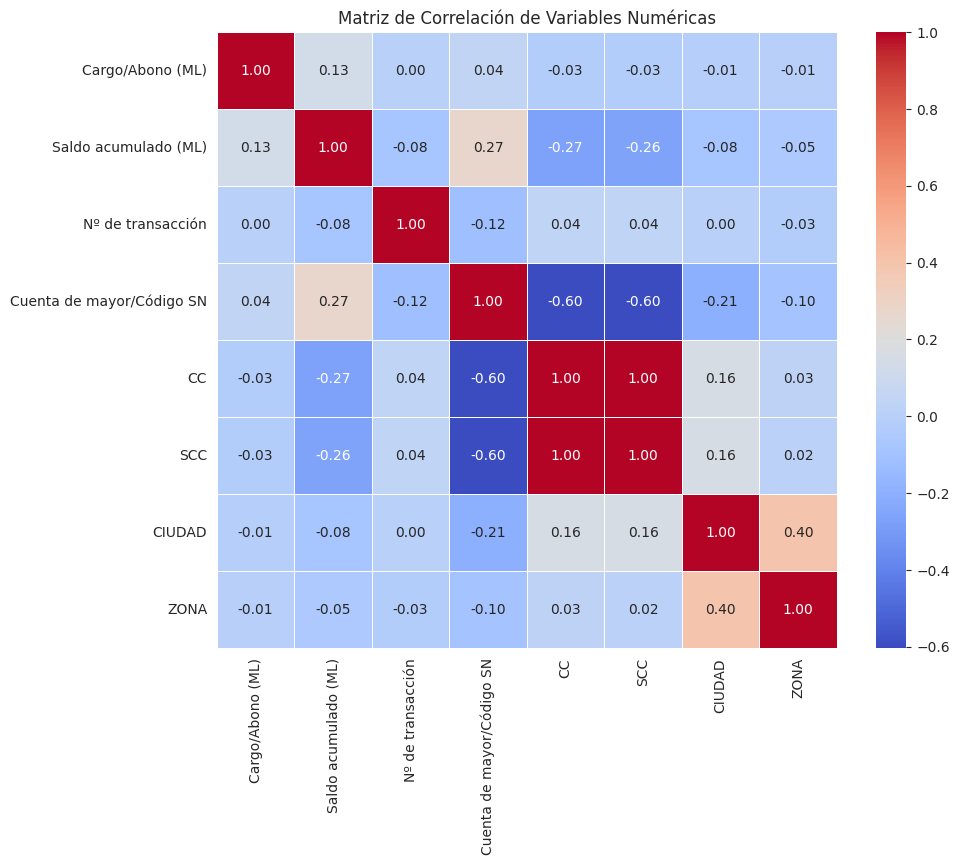

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

Correlation = ['Cargo/Abono (ML)', 'Saldo acumulado (ML)', 'Nº de transacción', 'Cuenta de mayor/Código SN', 'CC', 'SCC', 'CIUDAD', 'ZONA']

# Calcular la matriz de correlación
correlation_matrix = df[Correlation].corr()

# Visualizar la matriz de correlación usando Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Variables Numéricas")
plt.show()

Basándonos en los resultados de la matriz de correlación, podemos identificar las relaciones entre las variables numéricas y categóricas en nuestro conjunto de datos:

1. Correlaciones Positivas entre Variables Numéricas:

Se observa una correlación positiva moderada de 0.13 entre las variables numéricas. Esto sugiere que, en general, las variables numéricas tienden a moverse en la misma dirección, pero la relación no es muy fuerte.

2. Relaciones entre Variables Categóricas:

Las variables categóricas muestran una relación más fuerte entre sí en comparación con las variables numéricas. Se destaca una correlación de 0.4 entre la ciudad y la zona, lo que sugiere una asociación entre la ubicación geográfica y la zona de la transacción.
Además, la ciudad muestra correlaciones significativas con el subcentro de costo y el centro de costo, lo que indica una posible agrupación de actividades o transacciones según la ubicación.

3. Relación entre Saldo Acumulado y Cuenta Contable:

Se identifica una correlación positiva moderada de 0.27 entre el saldo acumulado y la cuenta contable. Esto sugiere que ciertos tipos de cuentas contables pueden tener un impacto en el saldo acumulado, lo que puede ser relevante para la gestión financiera y el análisis de tendencias.

4. Fuerte Relación entre Centro de Costo y Subcentro de Costo:

La correlación de 1 entre el centro de costo y el subcentro de costo indica una relación completa entre estas variables. Esto es esperable, ya que el subcentro de costo es una subdivisión del centro de costo y, por lo tanto, están intrínsecamente relacionados.

5. Correlaciones Negativas con el Saldo Acumulado y el centro de costo

Se observan correlaciones negativas entre el centro de costo y el saldo acumulado (-0.26) y entre el centro de costo y la cuenta contable (-0.6). Esto sugiere que ciertos centros de costo pueden estar asociados con saldos acumulados más bajos o ciertos tipos de cuentas contables, lo que puede indicar áreas de la organización con menor actividad o menor importancia financiera en relación con otras áreas.

## Concepto 2: Escalamiento, estandarización y codificación

In [59]:
# Definimos las categorías y los intervalos
intervals = [-float('inf'), 0, 10_000_000, float('inf')]  # Intervalos para negativo, adecuado, y elevado
labels = ['Reclasificaciones contables', 'Gastos Adecuados', 'Gastos Elevados']  # Etiquetas para las categorías

# Categorizamos la variable
df['Categoria_Cargo_Abono'] = pd.cut(df['Cargo/Abono (ML)'], bins=intervals, labels=labels, include_lowest=True)

# Visualizamos el resultado
df[['Cargo/Abono (ML)', 'Categoria_Cargo_Abono']]

,Cargo/Abono (ML),Categoria_Cargo_Abono
1,8.666700e+04,Gastos Adecuados
2,1.733330e+05,Gastos Adecuados
3,8.666600e+04,Gastos Adecuados
4,4.333400e+04,Gastos Adecuados
5,7.435000e+05,Gastos Adecuados
...,...,...
6005,-2.000000e+00,Reclasificaciones contables
6006,2.000000e-02,Gastos Adecuados
6007,7.000000e-02,Gastos Adecuados
6010,1.982260e+08,Gastos Elevados


Los valores mayores a 10 millones se clasificaron como "Gastos Elevados" porque superan un umbral significativo en el presupuesto o en la gestión financiera de la entidad. Estos gastos pueden ser considerados como excepcionales o fuera de lo común, y podrían requerir una atención especial o una revisión detallada debido a su impacto en el estado financiero.

Los valores de 0 a 10 millones se clasificaron como "Gastos Adecuados" porque representan el rango de gastos considerado dentro del presupuesto o permitido por la gestión financiera de la entidad. Estos gastos son típicamente los más comunes y se consideran apropiados dentro de los límites establecidos.

 Los valores negativos se clasificaron como "Reclasificaciones contables" porque representan reclasificaciones contables realizadas por los contadores para ajustar o corregir errores en el registro de transacciones. Estas reclasificaciones pueden incluir ajustes de conciliación, correcciones de errores contables, o transferencias entre cuentas para asegurar que el saldo final del ejercicio contable sea correcto y preciso.

In [60]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

data = df[['Cargo/Abono (ML)', 'Saldo acumulado (ML)']]
df1 = pd.DataFrame(data)


# Estandarización (Z-score)
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)

# Normalización (escalamiento mínimo-máximo)
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns)

# Visualizamos los resultados
print("Datos originales:")
print(df1)
print("\nEstandarización (Z-score):")
print(df_standardized)
print("\nNormalización (escalamiento mínimo-máximo):")
print(df_normalized)

Datos originales:
      Cargo/Abono (ML)  Saldo acumulado (ML)
1         8.666700e+04          2.159430e+09
2         1.733330e+05          2.159604e+09
3         8.666600e+04          2.159690e+09
4         4.333400e+04          2.159734e+09
5         7.435000e+05          2.160477e+09
...                ...                   ...
6005     -2.000000e+00          5.189396e+04
6006      2.000000e-02          5.189398e+04
6007      7.000000e-02          5.189405e+04
6010      1.982260e+08          2.897608e+09
6011      5.941410e+08          3.491749e+09

[5447 rows x 2 columns]

Estandarización (Z-score):
      Cargo/Abono (ML)  Saldo acumulado (ML)
0            -0.071498              2.523615
1            -0.063232              2.523869
2            -0.071499              2.523996
3            -0.075632              2.524060
4            -0.008845              2.525149
...                ...                   ...
5442         -0.079766             -0.641162
5443         -0.079765       

**Datos Originales:**

Las variables "Cargo/Abono (ML)" y "Saldo acumulado (ML)" tienen magnitudes y rangos de valores diferentes.
"Cargo/Abono (ML)" presenta una variedad de valores que van desde pequeños montos negativos hasta valores positivos en el rango de millones.
"Saldo acumulado (ML)" tiene valores que se encuentran en el rango de miles de millones, mostrando una escala mucho mayor en comparación con "Cargo/Abono (ML)".

**Estandarización (Z-score):**

La estandarización transforma las variables para que tengan una media de cero y una desviación estándar de uno.
Los valores estandarizados se expresan en unidades de desviación estándar con respecto a la media de la distribución original.
Las magnitudes de los valores estandarizados pueden ser comparadas directamente entre sí.

**Normalización (Escalamiento Mínimo-Máximo):**

La normalización escala los valores al rango de 0 a 1, donde el valor mínimo se convierte en 0 y el valor máximo se convierte en 1.
La normalización conserva la forma de la distribución original, pero cambia la escala de los datos para que estén en el mismo rango.


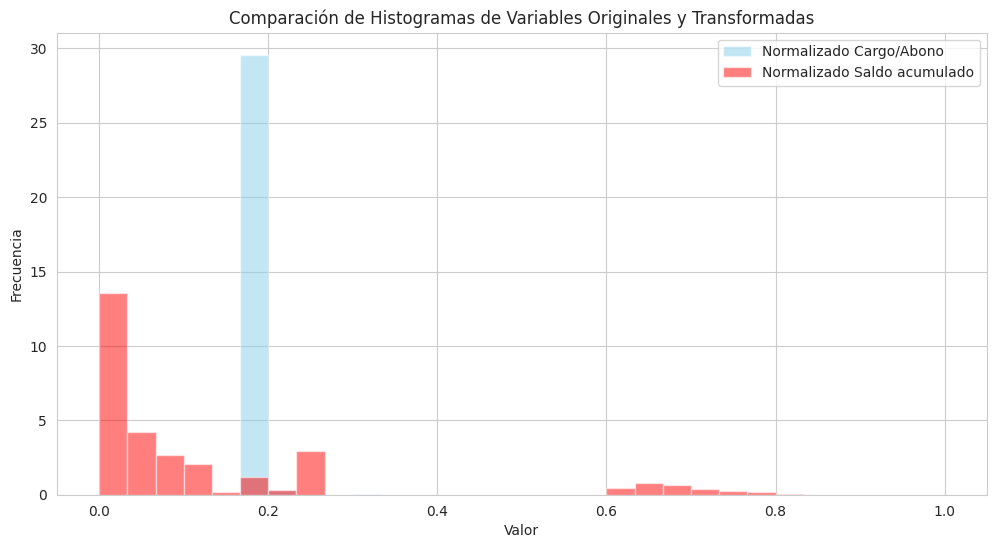

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos el tamaño del gráfico
plt.figure(figsize=(12, 6))

# Graficamos los histogramas de las variables originales y las transformadas
plt.hist(df_normalized['Cargo/Abono (ML)'], color='skyblue', label='Normalizado Cargo/Abono', bins=30, alpha=0.5, density=True)
plt.hist(df_normalized['Saldo acumulado (ML)'], color='red', label='Normalizado Saldo acumulado', bins=30, alpha=0.5, density=True)

# Agregamos etiquetas y título al gráfico
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Comparación de Histogramas de Variables Originales y Transformadas')
plt.legend()

# Mostramos el gráfico
plt.show()

In [62]:
# Variables numéricas
numeric_variables = df_normalized
numeric_descriptives = numeric_variables.agg(['count', 'mean', 'std', 'min', 'max', lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75)])
numeric_descriptives.index = ['Cantidad', 'Media', 'Desviación estándar', 'Mínimo', 'Máximo', 'Percentil 25', 'Percentil 50', 'Percentil 75']

numeric_descriptives

,Cargo/Abono (ML),Saldo acumulado (ML)
Cantidad,5447.000000,5447.000000
Media,0.190262,0.125303
Desviación estándar,0.014309,0.195426
Mínimo,0.000000,0.000000
Máximo,1.000000,1.000000
Percentil 25,0.189137,0.009254
Percentil 50,0.189300,0.042211
Percentil 75,0.189758,0.130325


### Comparación entre Variables:
Ambas variables muestran distribuciones similares en términos de concentración en valores bajos y sesgo hacia la derecha. Sin embargo, la variable "Saldo acumulado (ML)" exhibe una dispersión ligeramente mayor que la variable "Cargo/Abono (ML)", como se refleja en una media y desviación estándar normalizadas relativamente más altas. La presencia de valores atípicos en ambas variables sugiere la existencia de transacciones o movimientos financieros excepcionales en el conjunto de datos, que pueden ser importantes para comprender la salud financiera o los patrones de gasto de la entidad correspondiente.


## Concepto 3: Gráficos y visualización científica

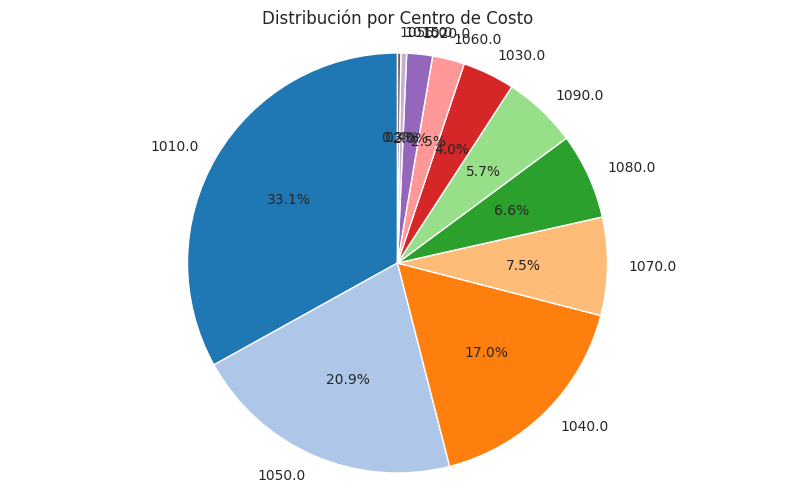

In [63]:
# Agrupar por conteo de la variable 'CC'
conteo_cc = df['CC'].value_counts()

# Crear el diagrama de pie
plt.figure(figsize=(10, 6))
plt.pie(conteo_cc, labels=conteo_cc.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)

# Añadir título
plt.title('Distribución por Centro de Costo')

# Mostrar el gráfico
plt.axis('equal')  # Mantener el aspecto de un círculo
plt.show()

**Diagrama de Pie:**

El centro de costo 1010 en general representa el mayor porcentaje, con un 33.1%. Esto indica que la mayoría de registros corresponden a este centro de costo en particular, mostrando ser el centro de costo principal o más común.
El centro de costo 1050 representa el segundo mayor porcentaje, con un 20.9%. Aunque es significativamente menor que el centro de costo en general, sigue siendo una parte importante de tus registros.
El centro de costo 1040 representa aproximadamente el 17% de los registros. Aunque es menor que los dos anteriores, aún tiene una participación considerable.
Finalmente, el centro de costo 1070 tiene el menor porcentaje, con un 7.5%. Esto indica que hay menos registros asociados con este centro de costo en comparación con los otros tres mencionados.

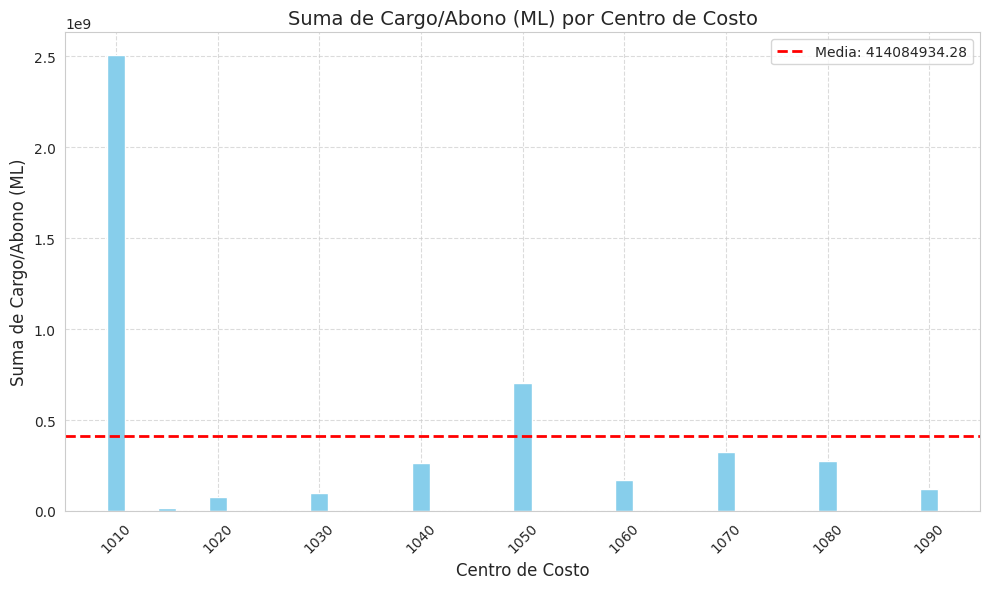

In [64]:
import matplotlib.pyplot as plt

# Establecer colores y estilos
color_barras = 'skyblue'
ancho_barras = 1.8

# Agrupar por Centro de Costo y calcular la suma de Cargo/Abono (ML) para cada grupo
sum_cargo_abono = df.groupby('CC')['Cargo/Abono (ML)'].sum()

# Crear el diagrama de barras
plt.figure(figsize=(10, 6))
plt.bar(sum_cargo_abono.index, sum_cargo_abono.values, color=color_barras, width=ancho_barras)

# Agregar etiquetas y título
plt.xlabel('Centro de Costo', fontsize=12)
plt.ylabel('Suma de Cargo/Abono (ML)', fontsize=12)
plt.title('Suma de Cargo/Abono (ML) por Centro de Costo', fontsize=14)

# Añadir cuadrícula al gráfico
plt.grid(True, linestyle='--', alpha=0.7)

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45, fontsize=10)

# Añadir línea horizontal en el valor medio
media = sum_cargo_abono.mean()
plt.axhline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')

# Mostrar el gráfico
plt.legend()
plt.tight_layout()  # Ajustar el diseño
plt.show()


**Grafico de barras:**

El gráfico de barras proporciona una representación visual clara del presupuesto asignado a cada centro de costo dentro de la compañía. Al observar el gráfico, se puede identificar rápidamente que el Centro de Costo 1010 destaca con el mayor gasto. Este centro, que parece estar asociado con los gastos administrativos de la empresa, como depreciaciones, impuestos y diferencias en tasas de cambio, muestra un nivel significativamente más alto de gastos en comparación con otros centros.

El segundo centro con mayor gasto es el correspondiente al área comercial. Esto sugiere que las actividades comerciales también representan una parte sustancial del presupuesto de la compañía, aunque se encuentran por debajo del gasto administrativo.

Por otro lado, los demás centros de costos muestran un gasto más moderado, generalmente por debajo de los 500 millones. Este patrón indica una distribución relativamente equitativa del presupuesto entre estos centros en comparación con los dos primeros mencionados.

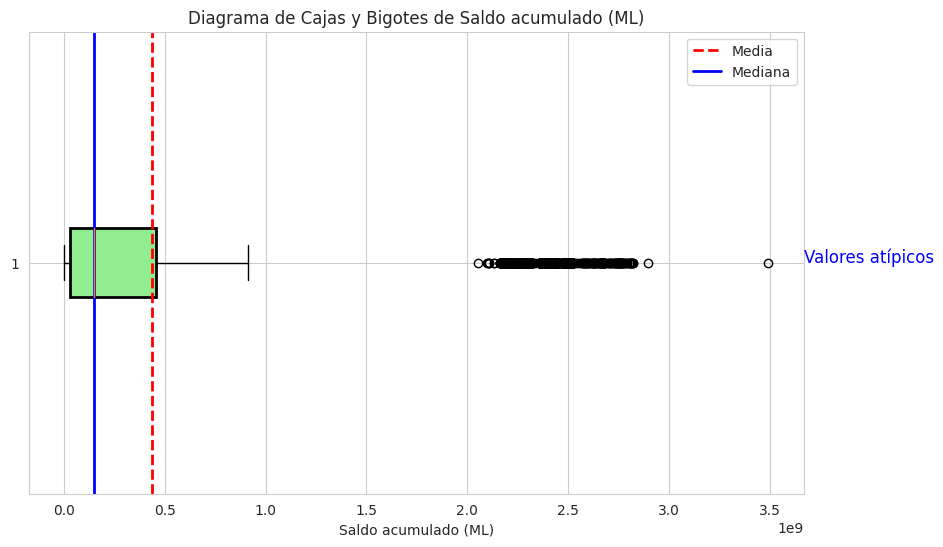

In [65]:
# Estilo del diagrama de cajas
boxprops = dict(facecolor='lightgreen', color='black', linewidth=2)

# Crear el diagrama de cajas y bigotes
plt.figure(figsize=(10, 6))
plt.boxplot(df['Saldo acumulado (ML)'], vert=False, patch_artist=True, boxprops=boxprops)

# Añadir líneas horizontales para la media y la mediana
plt.axvline(df['Saldo acumulado (ML)'].mean(), color='red', linestyle='--', linewidth=2, label='Media')
plt.axvline(df['Saldo acumulado (ML)'].median(), color='blue', linestyle='-', linewidth=2, label='Mediana')

# Añadir etiqueta para los valores atípicos
plt.text(df['Saldo acumulado (ML)'].max() * 1.05, 1, 'Valores atípicos', fontsize=12, color='blue')

# Agregar etiquetas y título
plt.xlabel('Saldo acumulado (ML)')
plt.ylabel('')  # Eliminar etiqueta del eje y
plt.title('Diagrama de Cajas y Bigotes de Saldo acumulado (ML)')

# Agregar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()



**Diagrama de cajas y bigotes:**

La caja (box): Los valores se encuentran dentro del rango de 0.1 y 0.46. Esto significa que al menos el 50% de los datos están comprendidos entre estos valores. La caja muestra la dispersión de estos datos y nos da una idea de la variabilidad en torno a la mediana. La mediana de los datos se encuentra en aproximadamente 0.2.

Los bigotes (whiskers): Los bigotes se extienden desde la caja hasta los valores mínimos y máximos dentro de un cierto rango. En este caso, los bigotes van desde aproximadamente 0.001 hasta 1. Esto nos indica la dispersión de los datos más allá de la caja.

Puntos fuera de los bigotes: Los valores atípicos se encuentran fuera del rango cubierto por los bigotes. En este caso, el valor atípico más lejano está en 3.5. Los puntos más lejanos dentro de los bigotes están entre 2 y 3, lo que indica la presencia de valores que podrían considerarse atípicos pero que aún están dentro de un rango más moderado.

<ipython-input-66-03ee753c8234>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='Cargo/Abono (ML)', y='Saldo acumulado (ML)', s=50, palette='coolwarm')


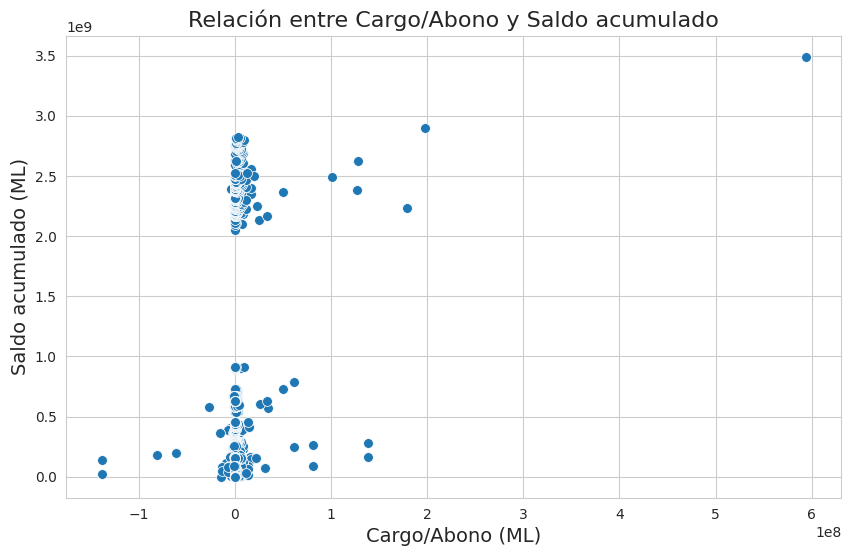

In [66]:
# Establecer estilo
sns.set_style("whitegrid")

# Crear el scatter plot con tamaño de puntos personalizado y paleta de colores
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Cargo/Abono (ML)', y='Saldo acumulado (ML)', s=50, palette='coolwarm')

# Añadir título y etiquetas de ejes
plt.title('Relación entre Cargo/Abono y Saldo acumulado', fontsize=16)
plt.xlabel('Cargo/Abono (ML)', fontsize=14)
plt.ylabel('Saldo acumulado (ML)', fontsize=14)

# Mostrar el gráfico
plt.show()

**Scatter Plot:**

Rango 1 (entre 0 y 1 en el eje x): La mayoría de los puntos se concentran en este rango en el eje x (Cargo/Abono), lo que indica que la mayoría de las transacciones tienen un valor bajo en términos de cargo o abono. Esto podría sugerir que la mayoría de las transacciones son de baja magnitud.

Rango 2 (entre 2 y 3 en el eje y): Además, se observa una concentración de puntos en este rango en el eje y (Saldo acumulado). Esto sugiere que hay un número significativo de transacciones que tienen un saldo acumulado en el rango entre 2 y 3. Esto podría indicar que algunas transacciones resultan en saldos acumulados más altos, probablemente debido a actividades específicas o eventos excepcionales.

La correlación entre las variables Cargo/Abono y Saldo acumulado es de 0.13. Dado que la correlación es relativamente baja, podemos inferir que no hay una relación lineal fuerte entre estas variables. Sin embargo, la presencia de una correlación positiva indica que hay una tendencia general de que los valores de Cargo/Abono y Saldo acumulado aumenten juntos, aunque la relación no es muy fuerte.

Se observan varios valores atípicos en el scatter plot. Estos valores están significativamente alejados de la concentración principal de puntos y pueden tener un impacto en la interpretación de la relación entre las variables.

<ipython-input-67-0c85e082579e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Categoria_Cargo_Abono', y='Cargo/Abono (ML)', palette='pastel', inner='quartile', linewidth=1.5)


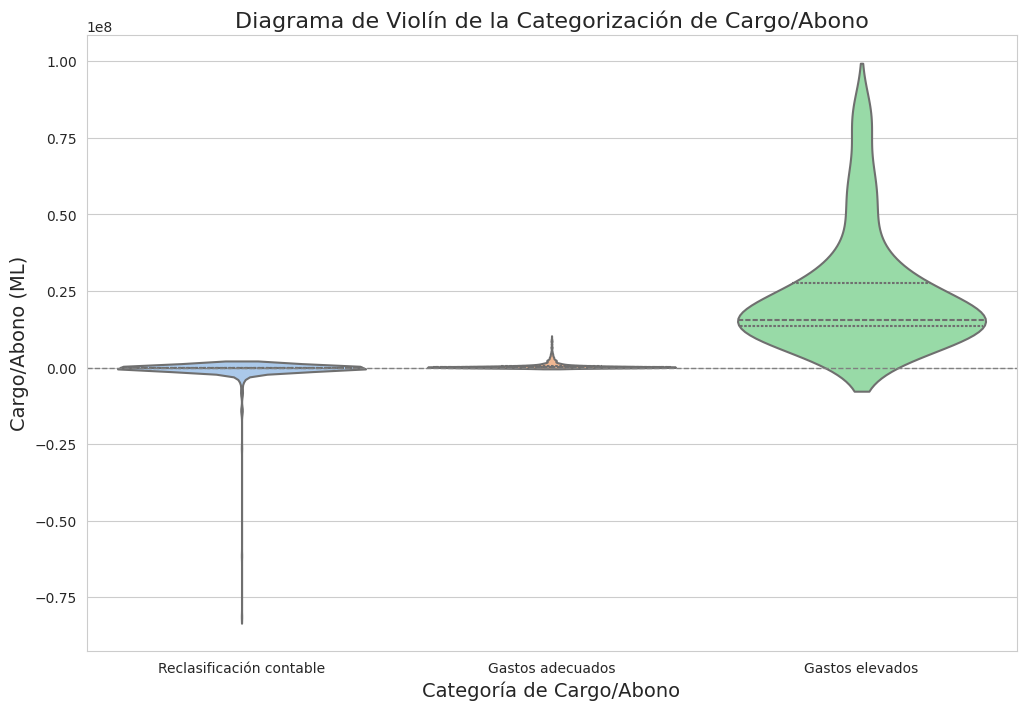

In [67]:
# Definir los rangos y etiquetas de categorías
categorias = ['Reclasificación contable', 'Gastos adecuados', 'Gastos elevados']
rangos = [-1e8, 0, 1e7, 1e8]  # Rangos correspondientes a cada categoría

# Categorizar la variable continua 'Cargo/Abono (ML)'
df['Categoria_Cargo_Abono'] = pd.cut(df['Cargo/Abono (ML)'], bins=rangos, labels=categorias)

# Establecer estilo
sns.set_style("whitegrid")

# Crear el diagrama de violín
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='Categoria_Cargo_Abono', y='Cargo/Abono (ML)', palette='pastel', inner='quartile', linewidth=1.5)

# Añadir título y etiquetas de ejes
plt.title('Diagrama de Violín de la Categorización de Cargo/Abono', fontsize=16)
plt.xlabel('Categoría de Cargo/Abono', fontsize=14)
plt.ylabel('Cargo/Abono (ML)', fontsize=14)

# Añadir una línea horizontal en el valor cero para una mejor referencia
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

# Mostrar el gráfico
plt.show()

**Diagrama de violin:**

- Reclasificación contable: El violín para la categoría de reclasificación contable muestra una distribución ancha alrededor del valor 0 en el eje y, lo que indica que la mayoría de los saldos se encuentran cerca de cero, lo que podría representar los ajustes contables para equilibrar los libros. La cola larga negativa sugiere la presencia de algunos gastos elevados que se han reclasificado. Sin embargo, esta cola es delgada, lo que indica que son relativamente pocos los valores de gastos elevados que han sido reclasificados.

- Gastos adecuados: El violín correspondiente a la categoría de gastos adecuados muestra una distribución estrecha alrededor del valor 0 en el eje y, lo que indica que la mayoría de los gastos se encuentran dentro del rango considerado como adecuado. La presencia de una cola positiva indica que hay algunos valores de gastos elevados dentro del rango de gastos adecuados, pero en general, la distribución es bastante concentrada alrededor del valor cero.

- Gastos elevados: El violín para la categoría de gastos elevados muestra una distribución más ancha alrededor del valor 0.15 en el eje y, lo que indica que hay una mayor dispersión de los saldos en esta categoría, con una densidad significativa en el rango de gastos elevados. La forma pronunciada del violín sugiere la presencia de varios grupos de gastos elevados. La cola ancha y densa en el lado positivo del eje y, indica la presencia de múltiples gastos similares y elevados.

In [68]:
import folium

# Crear un mapa centrado en Colombia
mapa = folium.Map(location=[4.5709, -74.2973], zoom_start=6)

# Agregar marcadores para cada código postal con su respectiva latitud y longitud
codigos_ciudades = {
    '11001': (4.6097, -74.0817),   # Bogotá
    '05001': (6.2442, -75.5812),   # Medellín
    '15001': (5.0687, -75.5174),   # Manizales
    '68001': (7.1193, -73.1227),   # Bucaramanga
    '76001': (3.4372, -76.5225),   # Cali
    '50001': (10.9639, -74.7964),  # Barranquilla
    '52001': (4.8133, -75.6961),   # Pereira
    '66001': (4.4389, -75.2024),   # Ibagué
    '08001': (7.0653, -73.8547),   # Barrancabermeja
    '13001': (10.3946, -75.4786),  # Cartagena
    '73001': (2.9983, -75.3064),   # Neiva
    '54001': (4.1533, -73.6349),   # Villavicencio
    '25307': (4.3078, -74.7976),   # Girardot
    '41503': (8.748, -75.8814),    # Montería
    '70001': (11.5444, -72.9072)   # Riohacha
}
# Agregar los marcadores al mapa
for ciudad, coordenadas in codigos_ciudades.items():
    folium.Marker(location=coordenadas, popup=ciudad).add_to(mapa)

# Mostrar el mapa
mapa


**Mapa**

El mapa muestra la distribución geográfica de los gastos realizados por la empresa en diferentes ciudades. Podemos observar la presencia de sucursales, clientes importantes o actividades comerciales significativas en esas áreas.

El mapa puede ayudar a identificar patrones de gastos y tendencias en diferentes regiones geográficas. Por ejemplo, es posible que haya una mayor concentración de gastos en ciudades con un alto nivel de actividad económica o en áreas donde la empresa tiene una presencia estratégica. Adicional, El mapa permite realizar un análisis comparativo de los gastos en diferentes ciudades, lo que puede ayudar a la empresa a tomar decisiones informadas sobre la asignación de recursos, la expansión de operaciones o la identificación de oportunidades de crecimiento en áreas específicas.

## Conclusiones

Durante el desarrollo de este trabajo, se ha llevado a cabo un exhaustivo análisis de los gastos incurridos por una organización, centrándose en su distribución geográfica y por centro de costo. A través de la aplicación de diversas técnicas de análisis de datos y visualización científica, se han obtenido insights significativos que contribuyen a una mejor comprensión de la situación financiera de la empresa.

En primer lugar, se realizaron parámetros y métricas descriptivas para todas las columnas de la base de datos, permitiendo obtener una visión general de las variables numéricas y categóricas. Se identificaron patrones de comportamiento, tendencias y relaciones entre las variables, lo que proporcionó una base sólida para el análisis posterior.

En el concepto de escalamiento, estandarización y codificación, se categorizaron y escalonaron variables continuas, lo que facilitó la comparación y análisis de distribuciones. Esto permitió identificar similitudes y diferencias en los gastos realizados por la empresa.

En el tercer concepto, se aplicaron una variedad de gráficos y visualizaciones para representar los datos. Desde diagramas de barras y cajas hasta diagramas de violín y mapas geoespaciales, cada visualización proporcionó información valiosa sobre los gastos de la organización y su distribución geográfica.

Como resultado de este análisis, se pudo concluir que los gastos de la organización están distribuidos de manera heterogénea tanto en términos geográficos como por centro de costo. Se identificaron centros de costo con mayores niveles de gasto, así como ciudades donde se concentra la mayor parte de las inversiones. Además, se observó una correlación significativa entre algunas variables, lo que sugiere posibles relaciones causales que podrían ser exploradas en futuros análisis.

## Referencias


- Alex Galea. (2018). Applied Data Science with Python and Jupyter: Use Powerful Industry-standard Tools to Unlock New, Actionable Insights From Your Data: Vol. 1st edition. Packt Publishing. (pp. 29-49).

- Boschetti, A., & Massaron, L. (2016). Python Data Science Essentials - Second Edition (Vol. 0002). Packt Publishing. (pp. 124-134).

- Samir Madhavan. (2015). Mastering Python for Data Science: Explore the World of Data Science Through Python and Learn How to Make Sense of Data. Packt Publishing. (pp. 77-106).

- Subramanian, G. (2015). Python Data Science Cookbook. Packt Publishing. (pp. 85-126).

- Thakur, A. (2016). Python: Real-World Data Science. Packt Publishing. (pp. 536 - 563).

In [69]:
# Guardar el DataFrame en un archivo de Excel
# df.to_excel('archivo.xlsx', index=False)